# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

# Load the Data

In [2]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [3]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ds.shape

(32561, 15)

# Categorical features

In [5]:
import category_encoders as ce

In [6]:
ds.dtypes[ds.dtypes=='object'].index


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'inc_class'],
      dtype='object')

In [7]:
ce_bin = ce.BinaryEncoder(cols = list(ds.dtypes[ds.dtypes=='object'].index))
ce_bin.fit_transform(ds)

,age,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,fnlwgt,education_0,education_1,education_2,...,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,inc_class_0,inc_class_1
0,39,0,0,0,0,1,77516,0,0,0,...,40,0,0,0,0,0,0,1,0,1
1,50,0,0,0,1,0,83311,0,0,0,...,13,0,0,0,0,0,0,1,0,1
2,38,0,0,0,1,1,215646,0,0,0,...,40,0,0,0,0,0,0,1,0,1
3,53,0,0,0,1,1,234721,0,0,0,...,40,0,0,0,0,0,0,1,0,1
4,28,0,0,0,1,1,338409,0,0,0,...,40,0,0,0,0,0,1,0,0,1
5,37,0,0,0,1,1,284582,0,0,1,...,40,0,0,0,0,0,0,1,0,1
6,49,0,0,0,1,1,160187,0,0,1,...,16,0,0,0,0,0,1,1,0,1
7,52,0,0,0,1,0,209642,0,0,0,...,45,0,0,0,0,0,0,1,1,0
8,31,0,0,0,1,1,45781,0,0,1,...,50,0,0,0,0,0,0,1,1,0
9,42,0,0,0,1,1,159449,0,0,0,...,40,0,0,0,0,0,0,1,1,0


# Algorithms

In [8]:
from sklearn.model_selection import train_test_split

#set x and y
#classification
ds_clf=ds.drop(['inc_class'], axis=1)
#binary encoding
ce_bin = ce.BinaryEncoder(cols = list(ds_clf.dtypes[ds_clf.dtypes=='object'].index))
ds_clf_bin_enc=ce_bin.fit_transform(ds_clf)
y_clf=[0 if ic==' <=50K' else 1 for ic in ds.inc_class]
#Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(ds_clf_bin_enc, y_clf, test_size=0.33, random_state=42)


#regression
ds_reg = ds.drop(['age'], axis=1)
ce_bin = ce.BinaryEncoder(cols = list(ds_reg.dtypes[ds_reg.dtypes=='object'].index))
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(ce_bin.fit_transform(ds_reg), ds.age, test_size=0.33, random_state=42)


In [9]:
X_train_c.shape

(21815, 42)

## Dimensionality reduction

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA

In [11]:
pca = PCA(n_components=2)
x_pca_clf=pca.fit_transform(ds_clf_bin_enc)
X_train_c2D, X_test_c2D, y_train_c2D, y_test_c2D = train_test_split(x_pca_clf, y_clf, test_size=0.33, random_state=42)


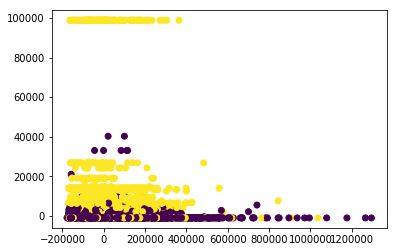

In [12]:
plt.scatter(x_pca_clf[:,0], x_pca_clf[:,1], c=y_clf)

### TSNE

In [13]:
tsne=TSNE(n_components=2)
x_tsne_clf=tsne.fit_transform(ds_clf_bin_enc)
X_train_c2D2, X_test_c2D2, y_train_c2D2, y_test_c2D2 = train_test_split(x_tsne_clf, y_clf, test_size=0.33, random_state=42)

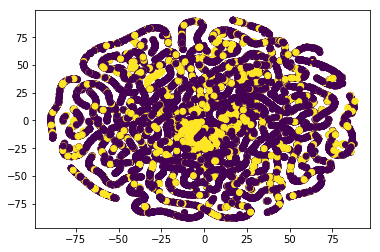

In [14]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], c=y_clf)

# Clustering

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering

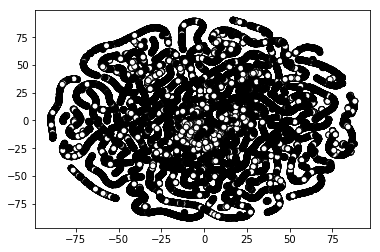

In [17]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], edgecolor='black', c=y_clf, cmap='gray')

## K-means

In [18]:
clst=KMeans(n_clusters=5).fit(x_tsne_clf)

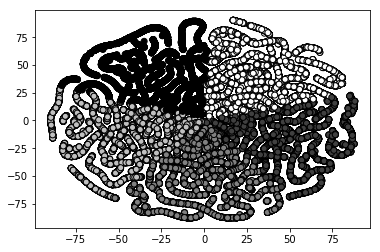

In [19]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], edgecolor='black', c=clst.labels_, cmap='gray')

## Agglomerative

In [20]:
clst2=AgglomerativeClustering(n_clusters=8).fit(x_tsne_clf)

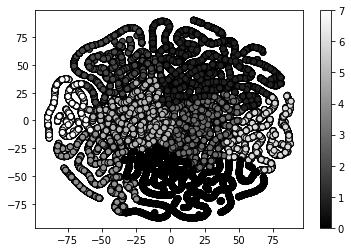

In [21]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], edgecolor='black', c=clst2.labels_, cmap='gray')
plt.colorbar()

In [24]:
df_clust=ds_clf_bin_enc.copy()
df_clust['clust']=clst2.labels_
df_clust['target']=y_clf
df_clust.groupby(['clust','target']).mean().T

clust                         0                             1                 \
target                        0              1              0              1   
age                   37.202286      44.794095      35.960008      43.768683   
workclass_0            0.000000       0.000000       0.000000       0.000000   
workclass_1            0.001510       0.000000       0.000376       0.000000   
workclass_2            0.168859       0.229215       0.167293       0.240569   
workclass_3            0.879232       0.813520       0.875141       0.821352   
workclass_4            0.824887       0.831391       0.846038       0.831317   
fnlwgt            147523.495148  146798.262626  228286.160721  240834.040569   
education_0            0.017037       0.002331       0.017649       0.004982   
education_1            0.131335       0.144522       0.132557       0.141637   
education_2            0.388182       0.355866       0.377957       0.345196   
education_3            0.707570       0.540793       0.689072       0.525267   
education_4            0.275178       0.374514       0.298348       0.387900   
education-num          9.555100      11.442890       9.607022      11.569395   
marital-status_0       0.000000       0.000000       0.000000       0.000000   
marital-status_1       0.097046       0.018648       0.084679       0.024199   
marital-status_2       0.542161       0.942502       0.511829       0.930961   
marital-status_3       0.654734       0.112665       0.656027       0.134520   
occupation_0           0.000000       0.000000       0.000000       0.000000   
occupation_1           0.280785       0.174825       0.285580       0.170819   
occupation_2           0.563511       0.564103       0.541495       0.573665   
occupation_3           0.468622       0.567988       0.470146       0.575089   
occupation_4           0.527928       0.298368       0.523094       0.282562   
relationship_0         0.000000       0.000000       0.000000       0.000000   
relationship_1         0.384516       0.032634       0.368194       0.039858   
relationship_2         0.359931       0.883450       0.360496       0.864769   
relationship_3         0.466897       0.190365       0.467330       0.223488   
race_0                 0.000000       0.000000       0.000000       0.000000   
race_1                 0.024154       0.008547       0.016335       0.006406   
race_2                 0.145137       0.061383       0.160345       0.104626   
race_3                 0.875566       0.958042       0.862561       0.934520   
sex_0                  0.403494       0.118881       0.383778       0.140214   
sex_1                  0.596506       0.881119       0.616222       0.859786   
capital-gain          60.183308     429.372960     131.097822    1437.159431   
capital-loss          43.893250     179.337218      30.368006     129.241993   
hours-per-week        38.642226      45.693862      38.872137      45.446263   
native-country_0       0.000000       0.000000       0.000000       0.000000   
native-country_1       0.009920       0.003108       0.008637       0.004270   
native-country_2       0.024801       0.015540       0.026849       0.019217   
native-country_3       0.037093       0.034965       0.039429       0.041993   
native-country_4       0.068363       0.055167       0.077169       0.065480   
native-country_5       0.048307       0.037296       0.066091       0.051246   
native-country_6       0.946086       0.963481       0.932595       0.952313   

clust                         2                             3                 \
target                        0              1              0              1   
age                   36.645185      43.491576      37.550536      44.870296   
workclass_0            0.000000       0.000000       0.000000       0.000000   
workclass_1            0.001124       0.000000       0.000325       0.000000   
workclass_2            0.172349       0.225966       0.181020       0.234588   